In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
upload = files.upload()

Saving employability_2.csv to employability_2 (3).csv


In [ ]:
df = pd.read_csv('employability_2 (2).csv')

In [ ]:
df.head()

,employ,gwa,training_attend,trainings_hours,work_stud
0,0,96,20,50,8
1,1,98,14,12,0
2,1,95,20,70,2
3,0,94,3,6,0
4,0,93,19,119,0


In [ ]:
X = df[['gwa', 'training_attend', 'trainings_hours', 'work_stud']]
y = df['employ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize and train the logistic regression model
logreg = LogisticRegression(random_state=16, solver='saga', C=0.01, penalty='l2')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, random_state=16, solver='saga')

In [ ]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print('Accuracy Score:', acc)

Accuracy Score: 0.5


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[28 20]
 [40 32]]


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_proba > 0.5))

ValueError: Found input variables with inconsistent numbers of samples: [80, 120]

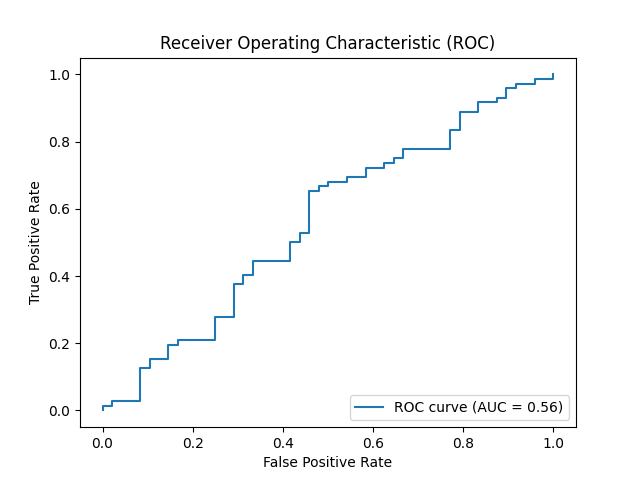

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cost function
def compute_cost(X, y, theta):
    m = len(y)  # number of training examples
    y_pred = sigmoid(np.dot(X, theta))  # predicted probabilities
    cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

# Prepare data
X = df[['gwa', 'training_attend', 'trainings_hours', 'work_stud']].values
y = df['employ'].values

# Add intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept term to X

# Initialize theta
theta = np.zeros(X.shape[1])  # number of parameters (features + intercept)

# Compute cost
cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")


Cost: 0.6931471805599452


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.5625 0.55   0.55   0.4875 0.5375]
Mean CV Accuracy: 0.54


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(LogisticRegression(random_state=16), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


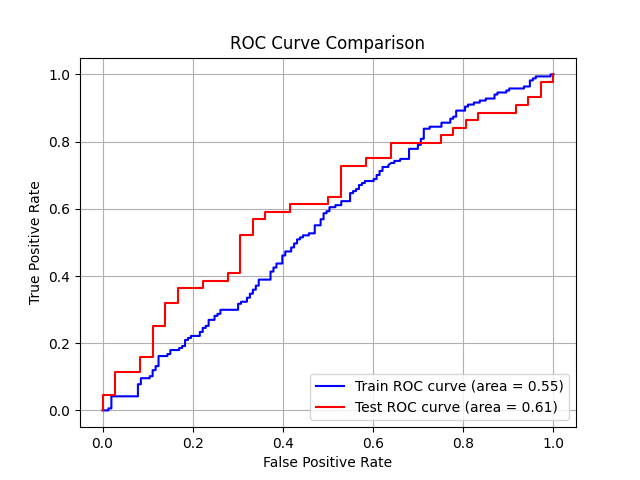

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_train_pred_proba = logreg.predict_proba(X_train)[:,1]
y_test_pred_proba = logreg.predict_proba(X_test)[:,1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (area = {roc_auc_score(y_train, y_train_pred_proba):.2f})')
plt.plot(fpr_test, tpr_test, color='red', label=f'Test ROC curve (area = {roc_auc_score(y_test, y_test_pred_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Intercept: 0.0891
           Feature  Coefficient  Odds Ratio
0              gwa    -0.177757    0.837146
3        work_stud    -0.142397    0.867277
2  trainings_hours     0.091930    1.096288
1  training_attend     0.063260    1.065303


<ipython-input-468-f7f57f7936d3>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


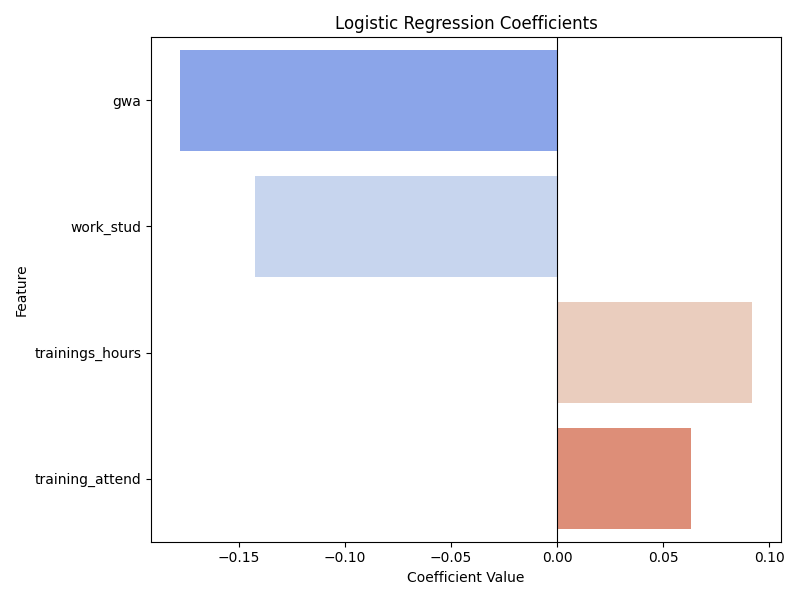

Optimization terminated successfully.
         Current function value: 0.683535
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 employ   No. Observations:                  320
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            4
Date:                Mon, 26 Aug 2024   Pseudo R-squ.:                 0.01250
Time:                        20:19:33   Log-Likelihood:                -218.73
converged:                       True   LL-Null:                       -221.50
Covariance Type:            nonrobust   LLR p-value:                    0.2363
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0891      0.113      0.790      0.430      -0.132       0.310
x1            -0.1799      0.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
# df = pd.read_csv('your_data.csv')
X = df[['gwa', 'training_attend', 'trainings_hours', 'work_stud']]
y = df['employ']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Extract coefficients
coefficients = logreg.coef_[0]
intercept = logreg.intercept_[0]

# Create summary DataFrame
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(f'Intercept: {intercept:.4f}')
print(coef_df)

# Visualize coefficients
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

# Statistical significance
X_train_sm = sm.add_constant(X_train_scaled)
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()
print(result.summary())


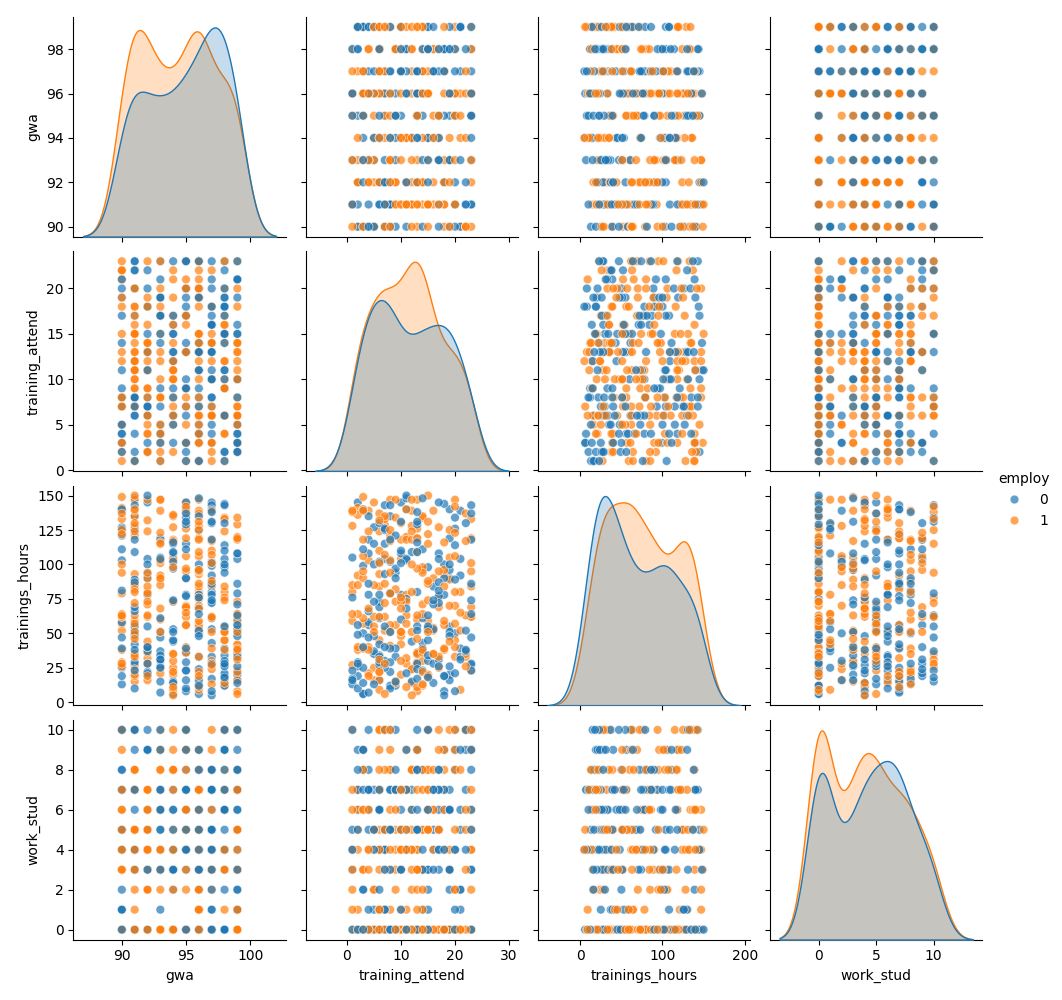

In [ ]:
df_viz = df[['gwa', 'training_attend', 'trainings_hours', 'work_stud', 'employ']]

# Pairplot to visualize pairwise relationships
sns.pairplot(df_viz, hue='employ', diag_kind='kde', plot_kws={'s': 40, 'alpha': 0.7})
plt.suptitle('Pairwise Relationships of Features with Target', y=1.02)
plt.show()